In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import data_clean_and_analysis,gmm,boosting,ranfom_forest,svm_boosting,boosting_vote,gaussian_bayes

# data clean and analysis

In [26]:
train,test,argu = data_clean_and_analysis.get_data()

### Argumented data analysis

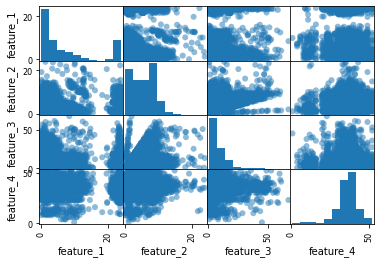

In [27]:
data_clean_and_analysis.scatter1(argu)

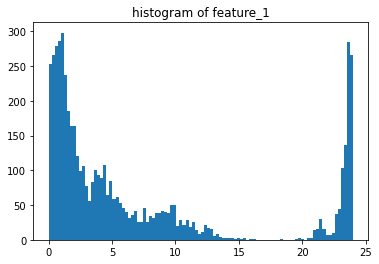

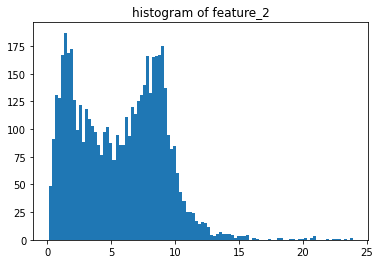

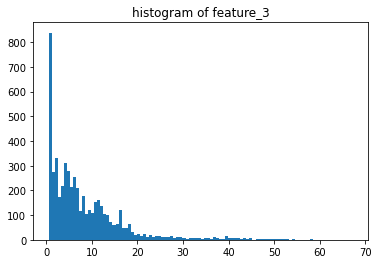

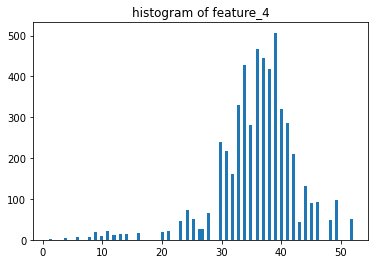

In [28]:
data_clean_and_analysis.histogram(argu)

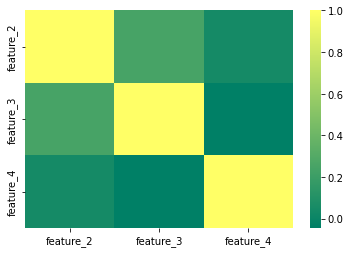

In [29]:
data_clean_and_analysis.heatmap(argu.iloc[:,1:])

### Train data analysis

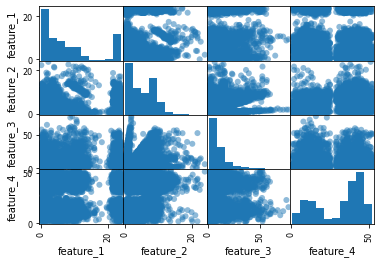

In [30]:
data_clean_and_analysis.scatter1(train)

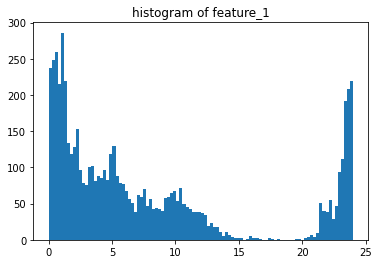

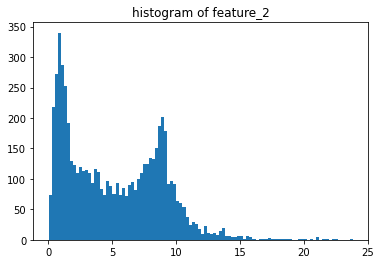

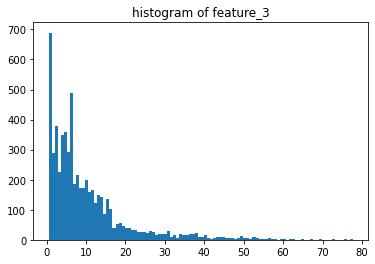

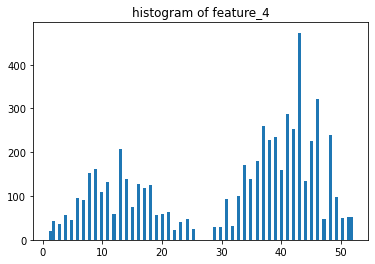

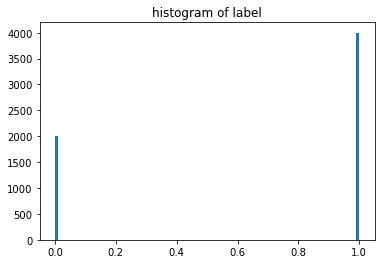

In [31]:
data_clean_and_analysis.histogram(train)

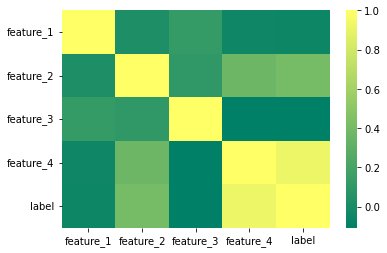

In [32]:
data_clean_and_analysis.heatmap(train)

### Test data analysis

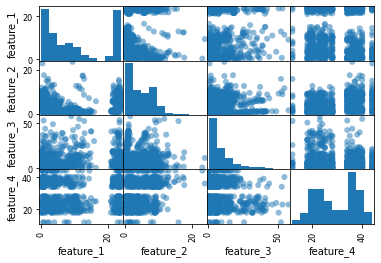

In [33]:
data_clean_and_analysis.scatter1(test)

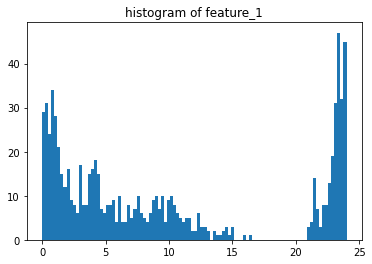

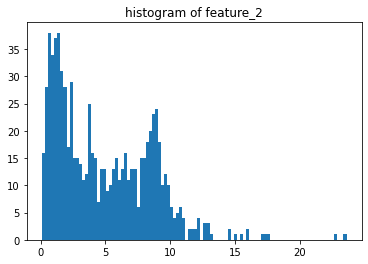

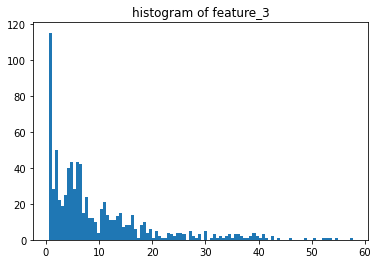

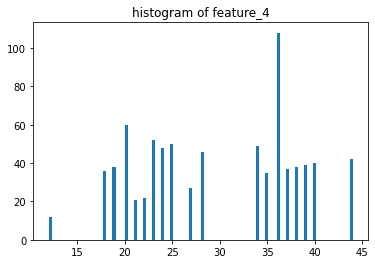

In [34]:
data_clean_and_analysis.histogram(test)

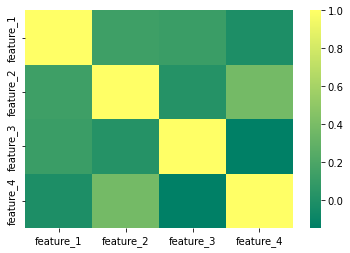

In [35]:
data_clean_and_analysis.heatmap(test)

# ML Algorithm

## BoostingClassifier

In [36]:
data_clean_and_analysis.test1(boosting.i_boosting)

(99.06666666666666, 0.05631944444444439)

## RF

### One Random Forest

In [37]:
data_clean_and_analysis.test1(ranfom_forest.i_rf)

(99.34166666666665, 0.04750000000000002)

#### Ensamble Random Forest

In [38]:
data_clean_and_analysis.test1(ranfom_forest.rf_ensamble)

(99.25833333333333, 0.0811805555555553)

## Gaussian Bayes

In [39]:
data_clean_and_analysis.test1(gaussian_bayes.i_gb)

(98.77083333333333, 0.05407986111111109)

## SVM & SVM_BOOSINTG

### SVM

In [40]:
data_clean_and_analysis.test1(svm_boosting.i_svm)

(98.78541666666668, 0.1089887152777772)

### SVM_BOOSTING

In [41]:
data_clean_and_analysis.test1(svm_boosting.svm_ensamble)

(98.91041666666666, 0.06471788194444439)

## Vote_boosing

In [42]:
print(data_clean_and_analysis.test1(boosting_vote.i_vb))
data_clean_and_analysis.test_aug(boosting_vote.i_vb,name="output_record/vb_120090438.csv")

(99.2875, 0.04269097222222192)


5104

## GMM

In [43]:
train_data = pd.DataFrame(train.iloc[:,3])
test_data = pd.DataFrame(test.iloc[:,3])
b = gmm.i_gmm(test_data,test_data,normal=True)
gmm.i_svm(train,test,b)

(0, 0.0)

### draw the plot of gmm

412
388


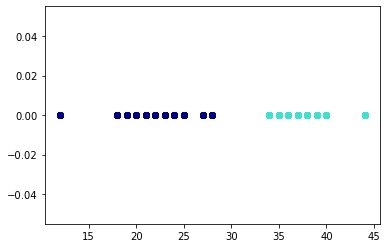

In [49]:
colors = ["navy", "turquoise"]
tmp = pd.read_csv('./output_record/submission.csv').iloc[:,1]
test['useless_feature'] = np.zeros(len(tmp))
test['predicted'] = tmp
test_matrix = test.iloc[:,3:6].values
for i, color in enumerate(colors):
        data = test_matrix[test_matrix[:,2] == i][:,0:2]
        print(len(data))
        plt.scatter(data[:, 0], data[:, 1], color=color)